In [ ]:

#  Setting display options 

import pandas as pd
   #
pd.set_option("display.width", 480)

#  Sets horizontal scroll for wide outputs
#
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

from tabulate import tabulate


   ###

    
#  Using tabulate below-
#
l_result = [{ "col1": 20, "col2": 30}]
   #
print(tabulate(l_result, headers='keys', tablefmt='psql'))


print("--")


In [25]:

#  Presenting an HTML style drop down list box (DDLB) inside your NoteBook
#
#     .  You can not have a print() or similar method invocation here, otherwise the DDLB won't display
#     .  See also,
#           https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

import ipywidgets as widgets

l_whichgraph = widgets.SelectMultiple(
   options=[
      "Graph 01 - Full graph",
      "Graph 02 - Similarity graph, just nodes of one type",
      "Graph 03 - Bi-paritite graph",
      ],
   value       = ["Graph 01 - Full graph"],
   description = "Use this: ",
   disabled    = False,
   layout      = {'width': 'max-content'}
   )

l_whichgraph                 #  Now run this cell as 'code'


SelectMultiple(description='Use this: ', index=(0,), layout=Layout(width='max-content'), options=('Graph 01 - …

In [15]:

#  Retrieving/using the currently selected value 
#

my_graph = l_whichgraph.value

print(my_graph)


('Graph 01 - Full graph',)


In [1]:

#  Presenting an HTML style radio button inside your NoteBook
#
#     .  You can not have a print() or similar method invocation here, otherwise the DDLB won't display
#     .  See also,
#           https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
#
#     (Much like HTML, this visual control has an ID. So, you can only have
#      one of these. IF you need two, you can, but you have more variable
#      work to do.)

#  Support function for a radio button UI used below
#

l_arr = [
   "Graph 01 - Full graph",
   "Graph 02 - Similarity graph, just nodes of one type",
   "Graph 03 - Bi-paritite graph",
]


def f_set_graph2():
   global l_whichgraph

#  if   (l_whichgraph.value == "Graph 02 - Similarity graph, just nodes of one type"):
   if   (l_whichgraph.value == l_arr[1]):
      l_str = GRAPH_NAME2
   elif (l_whichgraph.value == l_arr[2]):
      l_str = GRAPH_NAME3
   else:
      l_str = GRAPH_NAME1
   
   try:
      # l_my_graph, *_ = my_client.get_database(name=DB_NAME).find_graphs_by_name(l_str)
      # return l_my_graph
      return l_str
   except:
      return None

import ipywidgets as widgets

l_whichgraph = widgets.RadioButtons(
   options = [
      l_arr[0],
      l_arr[1],
      l_arr[2],
   ],
   default     = l_arr[0],
   description = "Use this: ",
   disabled    = False,
   layout      = {'width': 'max-content'}
)

l_whichgraph

RadioButtons(description='Use this: ', layout=Layout(width='max-content'), options=('Graph 01 - Full graph', '…

In [3]:

#  Retrieving/using the currently selected value 
#

my_graph = l_whichgraph.value

print(my_graph)


Graph 02 - Similarity graph, just nodes of one type


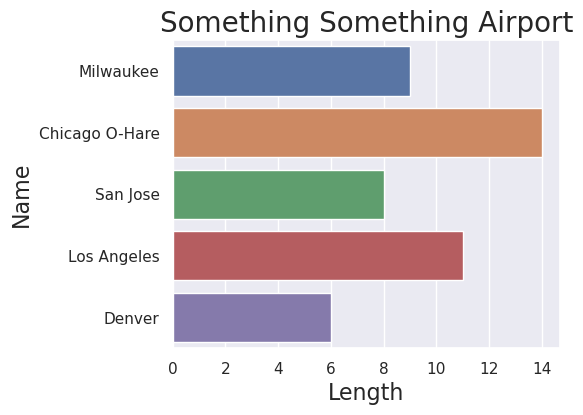

In [39]:

#  Creating a bar chart; this library needs a Pandas DataFrame, not Dask
#

import numpy as np
import pandas as pd
   #
import dask.array as da
import dask.dataframe as dd
   #
from dask.dataframe import from_pandas


NUM_PARTITIONS  = 3
   #
np_airports = np.array([
       #
   ["MKE", "Milwaukee"     , "WI", "Airport"],
   ["ORD", "Chicago O-Hare", "IL", "Airport"],
   ["SJC", "San Jose"      , "CA", "Airport"],
   ["LAX", "Los Angeles"   , "CA", "Airport"],
   ["DEN", "Denver"        , "CO", "Airport"],
       #
   ], dtype="str")

pd_airports = pd.DataFrame(np_airports, columns = ["airport_code", "airport_name", "state_code", "LABEL"])
   #
dd_airports = from_pandas(pd_airports, npartitions = NUM_PARTITIONS)
    
    
dd_airports["length"] = dd_airports.airport_name.map(lambda x: len(x))

pd_airports = dd_airports.compute()
    
   ############################

import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc = {'figure.figsize':(5,4)})

sns.barplot(x = "length", y = "airport_name", data=pd_airports)
   
plt.title("Something Something Airport", fontsize = 20)
plt.xlabel("Length",  size = 16)
plt.ylabel("Name",    size = 16)
   
plt.show()

